In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL, json, glob, cv2
from pathlib import Path
from scipy import signal

In [2]:
img_width = 200
input_files = glob.glob("*.jpg")
img_files = []; file_names = []; shapes = []
for img_file in input_files:
 fn = Path(img_file)  
 fn_wo_ext = str(fn.with_suffix(''))
 img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
 h, w = img.shape
 if w > img_width:
  r = img_width/w;
  img = cv2.resize(img, (img_width,int(r*h))) 
  img_files.append(img)
  file_names.append(img_file)
  shapes.append(img.shape)
  np.savetxt(fn_wo_ext+'.out', img)
  img.astype(img.dtype).tofile(fn_wo_ext+'.bin')   

  f = open(fn_wo_ext+".txt", "w")
  f.write(str(img.shape[0])+"\n")
  f.write(str(img.shape[1])+"\n")
  f.close()
     

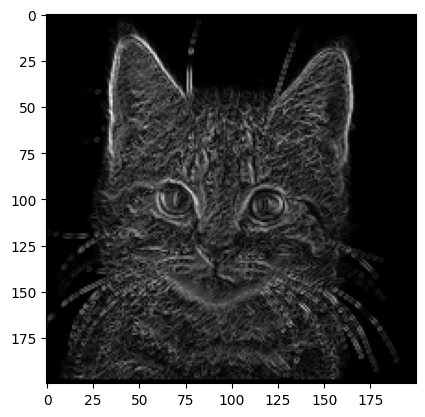

In [5]:
i = 0; 
enable_prepare = False #False: runs for grad bin file only
grad_fn = 'cat1-result.bin' #'cat1-grad.bin': from python code, 'cat1-result.bin': from C++ code
grad_dtype = np.uint8

if not enable_prepare:
    my_shape = (200,200)
    img = np.fromfile(grad_fn, dtype=grad_dtype).reshape(my_shape)
    plt.imshow(img, cmap='gray')
else:
    for img in img_files:
        scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                           [-10+0j, 0+ 0j, +10 +0j],
                           [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
        grad = signal.convolve2d(img, scharr, boundary='symm', mode='same')

        fn = Path(file_names[i])  
        fn_wo_ext = str(fn.with_suffix(''))
        
        fig, (ax_orig, ax_mag) = plt.subplots(2, 1, figsize=(6, 15))
        ax_orig.imshow(img, cmap='gray')
        ax_orig.set_title(f"{file_names[i]}: {shapes[i]}")
        ax_orig.set_axis_off()
        
        img_grad = np.absolute(grad)
        img_grad = img_grad/img_grad.max()*255.
        img_grad.astype(grad_dtype).tofile(fn_wo_ext+'-grad.bin')
        
        ax_mag.imshow(img_grad, cmap='gray')
        ax_mag.set_title('Gradient magnitude')
        ax_mag.set_axis_off()
        i = i+1
